In [12]:
import pandas as pd, numpy as np

df = pd.read_csv(r"X:\DMV\datasets\Bengaluru_House_Data.csv")
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-zA-Z0-9_]', '', regex=True)
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [13]:
# Handle missing values (fill numeric with mean, others with 'Unknown')
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna("Unknown")
df.isna().sum().head()

area_type       0
availability    0
location        0
size            0
society         0
dtype: int64

In [14]:
# Example merge (optional)
# demo = pd.read_csv(r"X:\DMV\datasets\Neighborhood_Info.csv")
# df = pd.merge(df, demo, on="location", how="left")
print("Merge complete (if dataset available).")


Merge complete (if dataset available).


In [15]:
# Filter properties within a certain price range
filtered = df[(df['price'] > 50) & (df['price'] < 200)]
filtered.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Unknown,1440,2.0,3.0,62.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0


In [16]:
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,3,40,419,13,464,70,2.0,1.0,39.07
1,2,80,317,19,2439,1288,5.0,3.0,120.00
2,0,80,1180,16,2492,514,2.0,3.0,62.00


In [17]:
# Average price by location
summary = df.groupby('location')['price'].mean().reset_index().sort_values(by='price', ascending=False)
summary.head()

,location,price
351,351,1900.000000
145,145,1486.000000
362,362,1167.714286
1266,1266,1093.388889
339,339,1068.000000


In [18]:
# Remove outliers using IQR
Q1, Q3 = df['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5*IQR) & (df['price'] <= Q3 + 1.5*IQR)]
print("Outliers handled. Final shape:", df.shape)

Outliers handled. Final shape: (12044, 9)


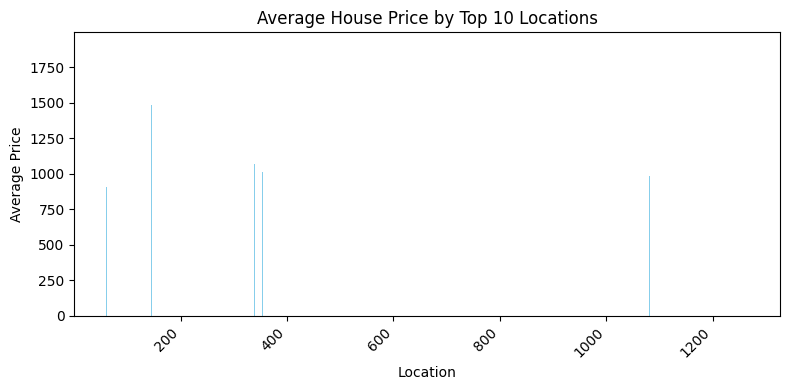

In [19]:
# (optional) visualization: Average price by top 10 locations
import matplotlib.pyplot as plt

top10 = summary.head(10)
plt.figure(figsize=(8,4))
plt.bar(top10['location'], top10['price'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Average House Price by Top 10 Locations")
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()
